# Bussiness Understanding

## 1. Latar Belakang

Dalam industri pertanian, identifikasi tipe padi menjadi aspek penting untuk memastikan kualitas dan efisiensi produksi. Dua tipe padi utama dalam dataset ini adalah Jasmine dan Gonen, yang memiliki karakteristik berbeda, baik dari segi fisik maupun kualitas hasil panen. Identifikasi manual seringkali tidak efisien dan rawan kesalahan, terutama untuk volume besar. Dengan dataset yang mencakup fitur geometris butir padi seperti Area, Perimeter, dan Roundness, pendekatan machine learning dapat membantu mengotomatisasi proses klasifikasi ini. Hal ini bertujuan meningkatkan akurasi, efisiensi, dan kecepatan identifikasi.



## 2. Masalah Bisnis

Bagaimana membangun model machine learning yang mampu mengklasifikasikan dua tipe padi, Jasmine dan Gonen, secara otomatis berdasarkan fitur geometrisnya?

## 3. Tujuan Proyek

1. Membangun model klasifikasi yang dapat memanfaatkan fitur geometris seperti Area, Eccentricity, dan Roundness untuk membedakan padi Jasmine dan Gonen.
2. Melakukan evaluasi model menggunakan metrik seperti akurasi, precision, recall, F1-score, dan confusion matrix untuk memastikan performa optimal.
3. Menghasilkan model yang dapat diterapkan pada dataset baru dengan performa konsisten.

# Data Understanding

## 1. Dataset yang digunakan

Dataset pada proyek kali ini menggunakan Rice Seed Dataset yang diperoleh dari Kaggle `https://www.kaggle.com/datasets/seymasa/rice-dataset-gonenjasmine`. Dataset ini memiliki 12 fitur diantaranya:
- **ID**: Menunjukkan nomor identifikasi unik untuk setiap sampel data padi.
- **Area**: Menunjukkan luas permukaan butir padi dalam satuan piksel atau unit lainnya.
- **MajorAxisLength**: Menunjukkan panjang sumbu utama elips yang sesuai dengan bentuk butir padi.
- **MinorAxisLength**: Menunjukkan panjang sumbu kecil elips yang sesuai dengan bentuk butir padi.
- **Eccentricity**: Menunjukkan tingkat keovalan butir padi, dihitung berdasarkan perbandingan antara panjang sumbu utama dan kecil (nilai mendekati 1 berarti lebih lonjong).
- **ConvexArea**: Menunjukkan luas area cembung yang melingkupi butir padi.
- **EquivDiameter**: Menunjukkan diameter ekivalen berdasarkan luas butir padi, dihitung seolah-olah luas butir adalah sebuah lingkaran sempurna.
- **Extent**: Menunjukkan rasio antara luas butir padi dengan luas bounding box yang melingkupinya.
- **Perimeter**: Menunjukkan panjang keliling dari butir padi.
- **Roundness**: Menunjukkan tingkat kebulatan butir padi, dihitung berdasarkan keliling dan luas (nilai lebih tinggi berarti lebih bulat).
- **AspectRation**: Menunjukkan rasio antara panjang sumbu utama dan panjang sumbu kecil elips, memberikan indikasi bentuk.
- **Class**: Menunjukkan tipe padi (label target) yang diklasifikasikan, yaitu Jasmine atau Gonen.

## 2. Load Dataset

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:\Dika\MSIB\Dicoding\Machine Learning\Rice-Gonen andJasmine.csv')
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,Gonen
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,Gonen
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,Gonen
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,Gonen


## 3. Analisis Struktur dan Statistika Deskriptif

In [68]:
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  object 
dtypes: float64(8), int64(3), object(1)
memory usage: 1.7+ MB


## 4. Analisis Distribusi data

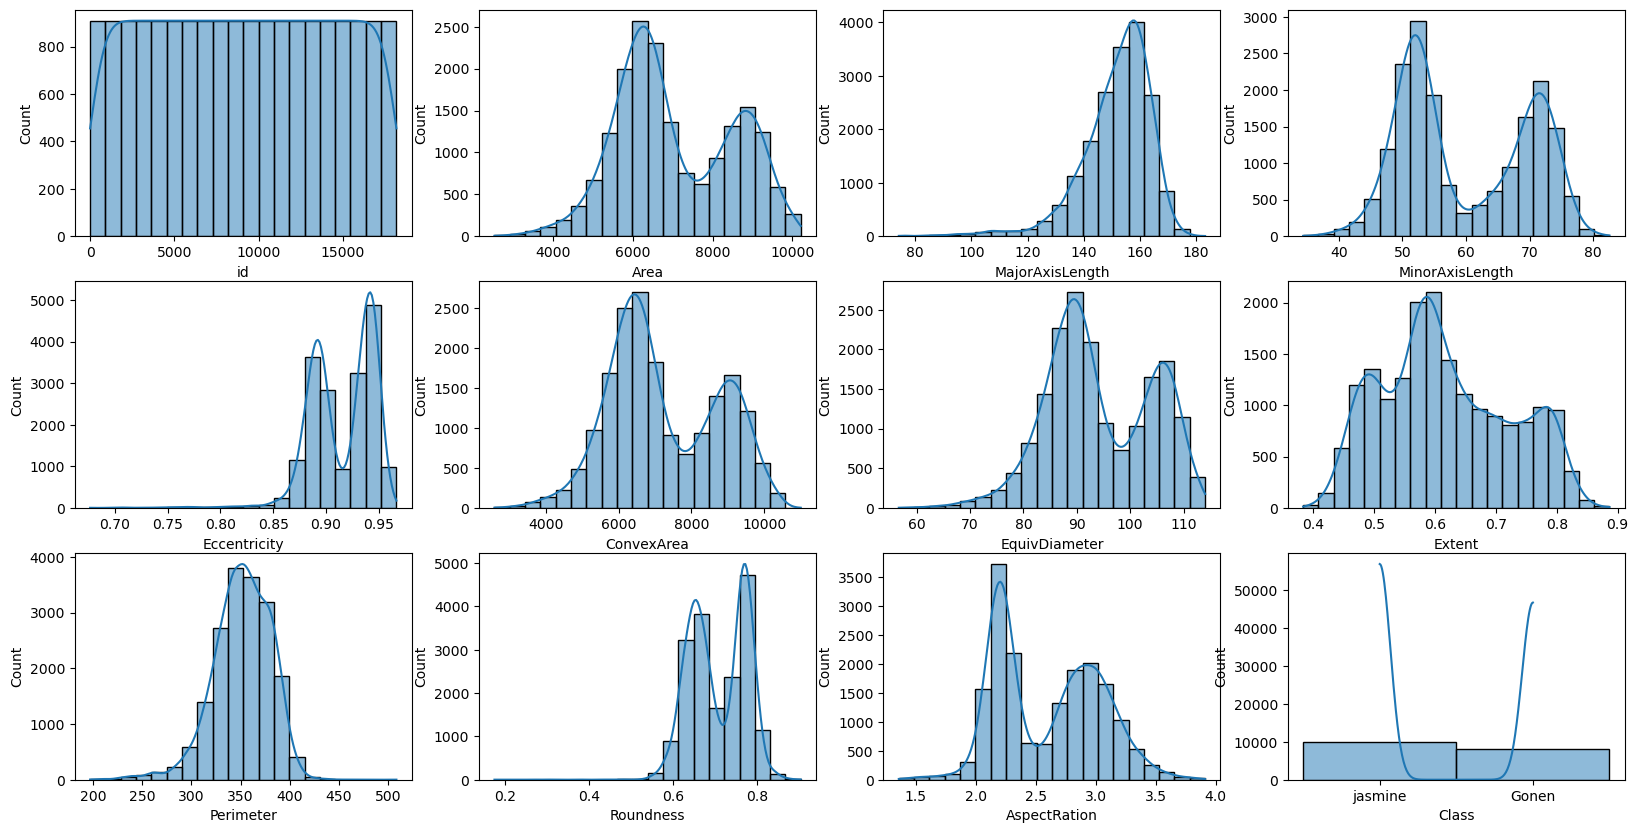

In [70]:
i=1
plt.figure(figsize=(20, 10))
for col in df.columns:
    plt.subplot(3, 4, i)
    sns.histplot(data=df, x=col, bins=20, kde=True)
    i += 1
plt.show()

C:\Users\khafidz\AppData\Local\Temp\ipykernel_19076\3179425621.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette='viridis')


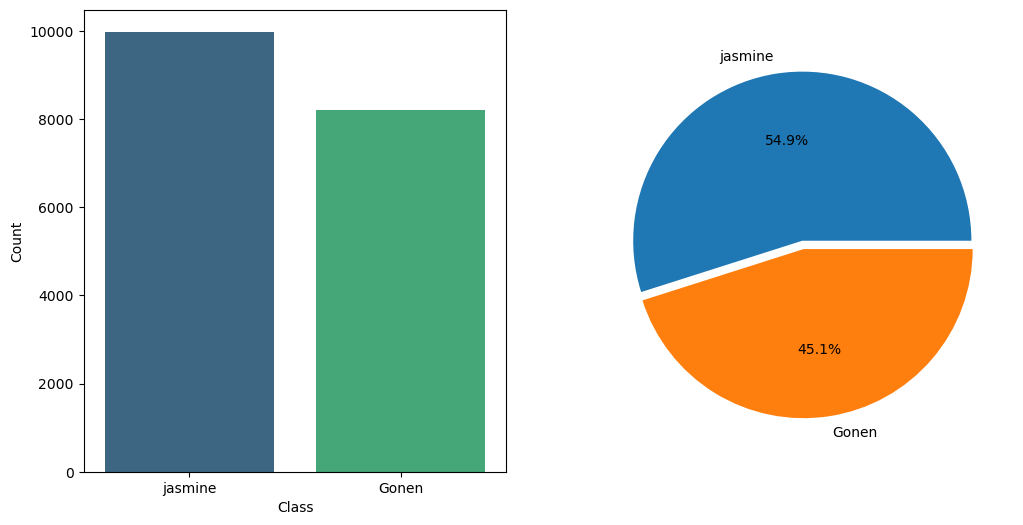

In [71]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Class', palette='viridis')
plt.xlabel("Class")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.pie(x=df['Class'].value_counts(), labels=df['Class'].unique(), autopct='%1.1f%%', explode=(0, 0.05))

plt.show()

# Data Preparation

## 1. Penanganan Missing Value dan Duplikasi Data

In [72]:
print(df.isnull().sum())

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64


In [73]:
df.duplicated().sum()

0

## 2. Pengecekan Outliers

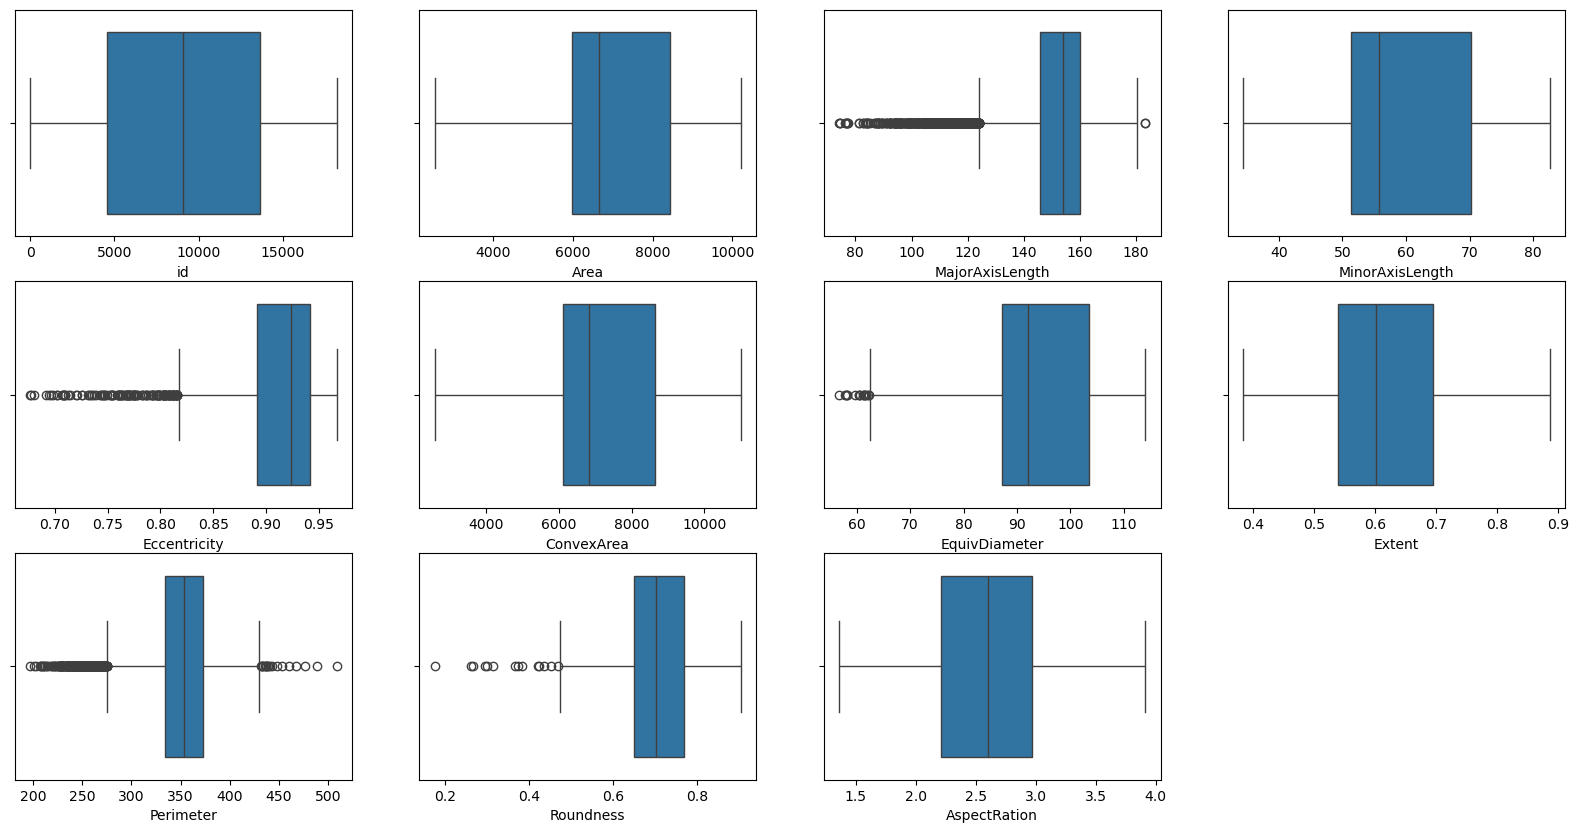

In [74]:
i=1
plt.figure(figsize=(20, 10))
for col in df.columns[:-1]:
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, x=col)
    i += 1
plt.show()

Pada kolom MajorAxisLength, Eccentricity, EquivDiameter, Perimeter, dan Roundness terdapat outliers. Kita akan

In [75]:
def iqr_method(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[column] >= Q1 - 1.5*IQR) & (data[column] <= Q3 + 1.5*IQR)]

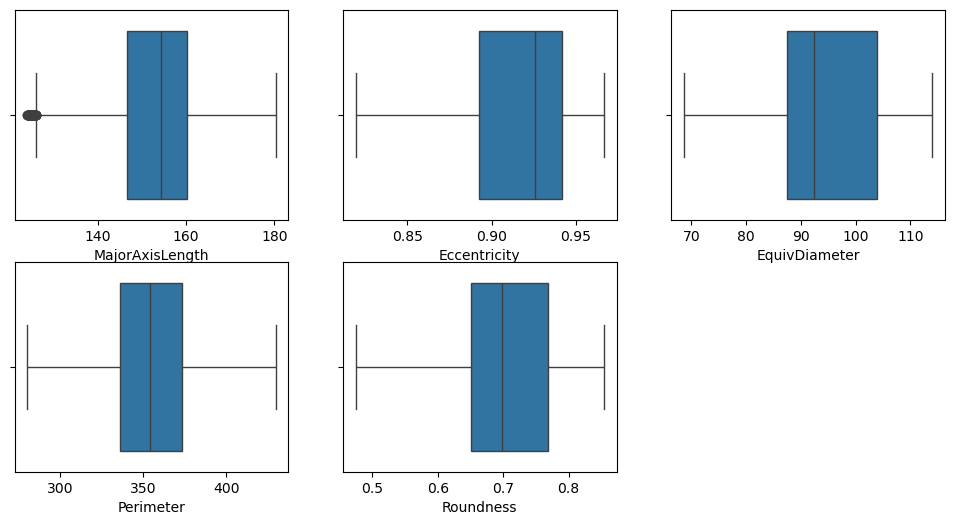

In [76]:
i=1
outliers_list = ['MajorAxisLength', 'Eccentricity', 'EquivDiameter', 'Perimeter', 'Roundness']
plt.figure(figsize=(12,6))
for col in outliers_list:
    df = iqr_method(df, col)
for col in outliers_list:
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col)
    i+=1
plt.show()

In [77]:
df.shape

(17597, 12)

## 3. Analisis Korelasi

In [78]:
df['Class'] = df['Class'].map({'jasmine':0, 'Gonen':1})

Kita mengubah class jasmine menjadi 0 dan Gonen menjadi 1

In [79]:
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
158,159,6374,129.576759,63.762307,0.870549,6476,90.086785,0.662234,314.656,0.809003,2.032184,0
186,187,6946,136.303603,65.738475,0.876009,7115,94.042128,0.594437,338.782,0.760508,2.073422,0
207,208,5786,125.555431,59.626250,0.880040,5945,85.831020,0.623491,307.304,0.769931,2.105707,0
218,219,5896,127.013995,59.843292,0.882050,6092,86.643063,0.610352,309.264,0.774655,2.122443,0
227,228,6082,129.098407,60.416315,0.883736,6204,87.999107,0.661375,308.106,0.805111,2.136814,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,1
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,1
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,1
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,1


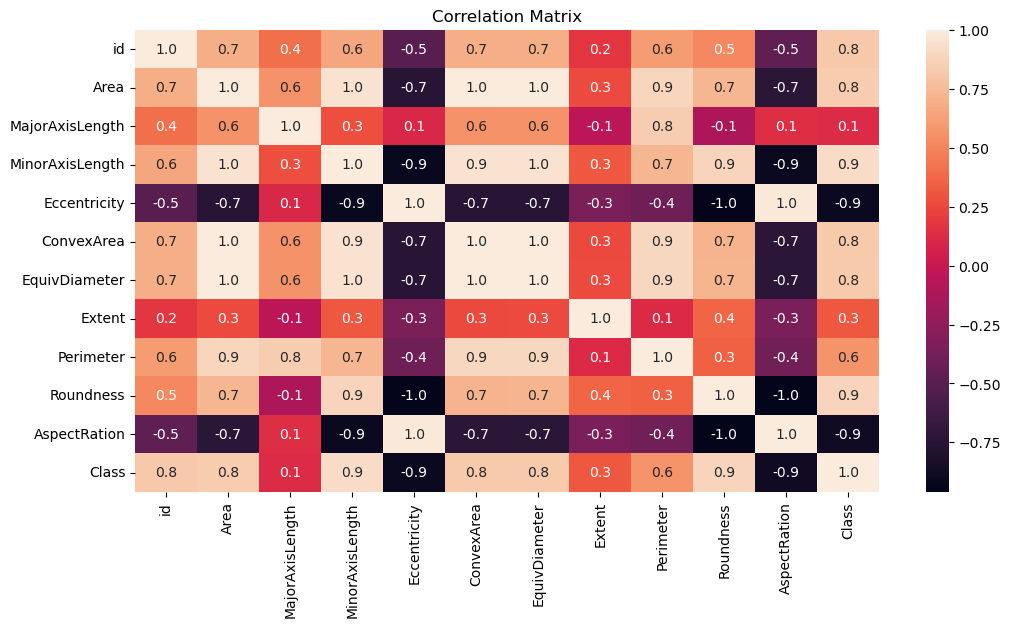

In [80]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df.corr(), annot=True, fmt=".1f")
plt.title("Correlation Matrix")
plt.show()


## 3. Splitting Data

In [81]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

## 4. Standarisasi Fitur

In [82]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()

X_scaled = scaller.fit_transform(X)

In [83]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled, y,test_size = 0.2)

# Modelling

In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

models = {'GaussianNB' : GaussianNB(), 'LinearSVC' : LinearSVC(), 'DecisionTree' : DecisionTreeClassifier()}

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
cm_scores = []

# Evaluation

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

for i in models:
    model = models[i]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    cm_scores.append(cm)

In [86]:
evaluasi = {
    "accuracy" : accuracy_scores,
    "precision" : precision_scores,
    "recall" : recall_scores,
    "f1-score" : f1_scores
}

eval = pd.DataFrame(evaluasi, index=['GaussianNB', 'LinearSVC', 'DecisionTree'])
eval

,accuracy,precision,recall,f1-score
GaussianNB,0.994318,0.998743,0.988799,0.993746
LinearSVC,1.000000,1.000000,1.000000,1.000000
DecisionTree,1.000000,1.000000,1.000000,1.000000


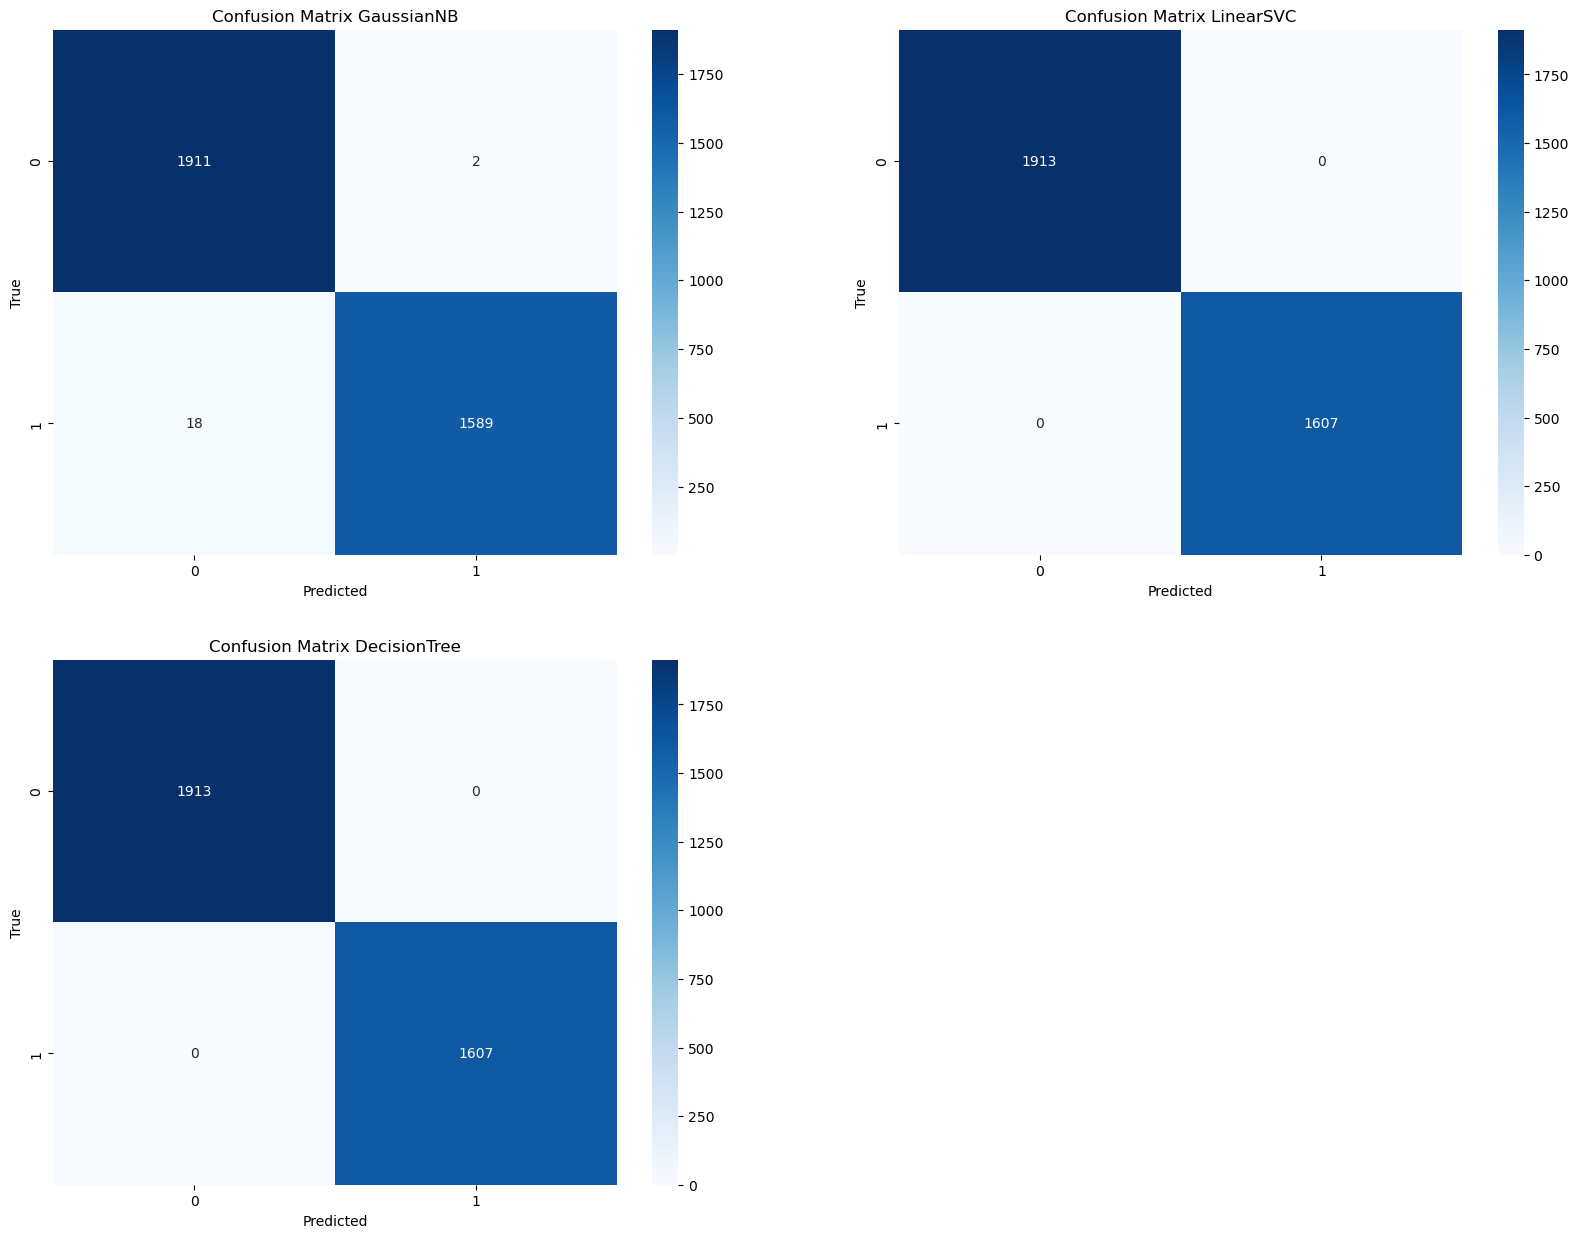

In [87]:
plt.figure(figsize=(20, 15))
for i in range(len(cm_scores)):
    plt.subplot(2, 2, i+1)
    sns.heatmap(cm_scores[i], annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    if (i == 0):
        plt.title("Confusion Matrix GaussianNB")
    elif (i == 1):
        plt.title("Confusion Matrix LinearSVC")
    else:
        plt.title("Confusion Matrix DecisionTree")
plt.show()

Model GaussianNB, LinearSVC, dan DecisionTree mampu memprediksi jenis padi dengan **Sangat Baik** berdasarkan fitur-fitur yang tersedia. Nilai Akurasi model-model ini mencapai 100% pada algoritma LinearSVC dan DecisionTree, sedangkan untuk algoritma GaussianNB tingkat akurasinya sebesar 99.43%. Hal ini menunjukkan model memiliki kemampuan generalisasi yang baik terhadap data yang diberikan